## DATA PREVIEW

In [1]:
# 데이터 출처 : https://github.com/songys/Chatbot_data
# Chatbot_data_for_Korean v1.0
# 챗봇 트레이닝용 문답 페어 11,876개, Q(Query), A(Answer), label로 구성
# 일상다반사 0, 이별(부정) 1, 사랑(긍정) 2로 레이블링

## EDA

In [60]:
# 필요한 모듈을 임포트
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from wordcloud import WordCloud

from konlpy.tag import Okt

In [3]:
DATA_IN_PATH = './data/'

data = pd.read_csv(DATA_IN_PATH + 'ChatbotData.csv', encoding='utf-8')
data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [4]:
# Q(Query)과 A(Answer) 모두에 대해 길이를 분석하기 위해, 두 데이터를 하나의 리스트로 만든다
sentences = list(data['Q'] + data['A'])

In [16]:
# 각 기준에 따라 토크나이징
# 기준 : 문자 단위(음절) / 단어 단위(어절) / 형태소 단위
tokenized_sentences = [s.split() for s in sentences] # 띄어쓰기 기준(단어 단위)으로 문장을 나눈다
sent_len_by_token = [len(t) for t in tokenized_sentences] # 단어(어절)의 길이
sent_len_by_eumjeol = [len(s.replace(' ','')) for s in sentences] # 문자(음절)의 길이

okt = Okt()

morph_tokenized_sentences = [okt.morphs(s.replace(' ','')) for s in sentences] # 형태소 단위로 나눈다
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences] # 형태소의 길이

Text(0, 0.5, 'Number of Sentences')

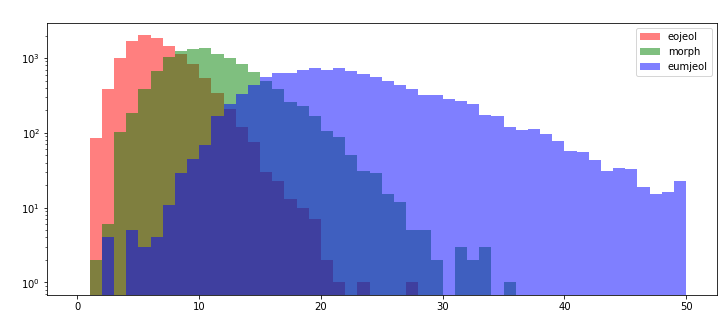

In [23]:
# 음절, 어절, 형태소에 대한 그래프
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token,   bins=50, range=[0,50], alpha=0.5, color='r', label='eojeol')
plt.hist(sent_len_by_morph,  bins=50, range=[0,50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')
plt.yscale('log')
plt.legend()
plt.title('Sentence Length Histogram', color='w')
plt.xlabel('Sentece Length', color='w')
plt.ylabel('Number of Sentences', color='w')

# 이상치 : 어절은 길이가 20 이상인 경우, 형태소와 음절은 각각 길이가 30, 45 이상인 경우

In [25]:
# 어절, 형태소, 음절에 대한 통계값
print('어절 최대길이: {}'.format(np.max(sent_len_by_token)))
print('어절 최소길이: {}'.format(np.min(sent_len_by_token)))
print('어절 평균길이: {:.2f}'.format(np.mean(sent_len_by_token)))
print('어절 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_token)))
print('어절 중간길이: {}'.format(np.median(sent_len_by_token)))
print('어절 제 1사분위: {}'.format(np.percentile(sent_len_by_token, 25)))
print('어절 제 3사분위: {}'.format(np.percentile(sent_len_by_token, 75)))

어절 최대길이: 27
어절 최소길이: 1
어절 평균길이: 6.28
어절 길이 표준편차: 2.67
어절 중간길이: 6.0
어절 제 1사분위: 4.0
어절 제 3사분위: 8.0


In [26]:
print('형태소 최대길이: {}'.format(np.max(sent_len_by_morph)))
print('형태소 최소길이: {}'.format(np.min(sent_len_by_morph)))
print('형태소 평균길이: {:.2f}'.format(np.mean(sent_len_by_morph)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_morph)))
print('형태소 중간길이: {}'.format(np.median(sent_len_by_morph)))
print('형태소 제 1사분위: {}'.format(np.percentile(sent_len_by_morph, 25)))
print('형태소 제 3사분위: {}'.format(np.percentile(sent_len_by_morph, 75)))

형태소 최대길이: 35
형태소 최소길이: 1
형태소 평균길이: 10.76
형태소 길이 표준편차: 3.96
형태소 중간길이: 10.0
형태소 제 1사분위: 8.0
형태소 제 3사분위: 13.0


In [27]:
print('음절 최대길이: {}'.format(np.max(sent_len_by_eumjeol)))
print('음절 최소길이: {}'.format(np.min(sent_len_by_eumjeol)))
print('음절 평균길이: {:.2f}'.format(np.mean(sent_len_by_eumjeol)))
print('음절 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_eumjeol)))
print('음절 중간길이: {}'.format(np.median(sent_len_by_eumjeol)))
print('음절 제 1사분위: {}'.format(np.percentile(sent_len_by_eumjeol, 25)))
print('음절 제 1사분위: {}'.format(np.percentile(sent_len_by_eumjeol, 75)))

음절 최대길이: 70
음절 최소길이: 2
음절 평균길이: 22.61
음절 길이 표준편차: 7.66
음절 중간길이: 21.0
음절 제 1사분위: 17.0
음절 제 1사분위: 27.0


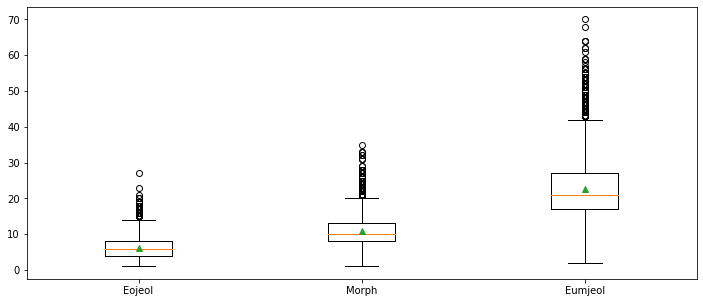

In [33]:
# 위의 세 통계값에 대한 박스플롯
plt.figure(figsize=(12, 5))
plt.boxplot([sent_len_by_token, sent_len_by_morph, sent_len_by_eumjeol], 
            labels=['Eojeol', 'Morph', 'Eumjeol'] ,showmeans=True)
plt.show()

In [50]:
# Q(Query)과 A(Answer)의 형태소 길이를 따로 분석
query_sentences = list(data['Q'])
answer_sentences = list(data['A'])

# Q(Query)의 형태소 길이
query_morph_tokenized_sentences = [okt.morphs(s.replace(' ','')) for s in query_sentences]
query_sent_len_by_morph = [len(t) for t in query_morph_tokenized_sentences]

# A(Answer)의 혀태소 길이
answer_morph_tokenized_sentences = [okt.morphs(s.replace(' ','')) for s in answer_sentences]
answer_sent_len_by_morph = [len(t) for t in answer_morph_tokenized_sentences]

Text(0, 0.5, 'Number of Queries and Answers')

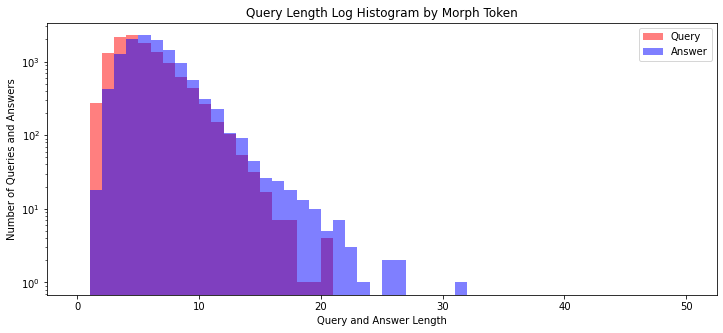

In [52]:
# 박스 플롯
plt.figure(figsize=(12, 5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0,50], color='r', alpha=0.5, label='Query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0,50], color='b', alpha=0.5, label='Answer')
plt.legend()
plt.yscale('log', nonposy='clip')
plt.title('Query Length Log Histogram by Morph Token')
plt.xlabel('Query and Answer Length')
plt.ylabel('Number of Queries and Answers')

In [57]:
# Query와 Answer 형태소의 통계값
print('Query 통계값 :')
print('Query 형태소 최대길이: {}'.format(np.max(query_sent_len_by_morph)))
print('Query 형태소 최소길이: {}'.format(np.min(query_sent_len_by_morph)))
print('Query 형태소 평균길이: {:.2f}'.format(np.mean(query_sent_len_by_morph)))
print('Query 형태소 길이 표준편차: {:.2f}'.format(np.std(query_sent_len_by_morph)))
print('Query 형태소 중간길이: {}'.format(np.median(query_sent_len_by_morph)))
print('Query 형태소 제 1사분위: {}'.format(np.percentile(query_sent_len_by_morph, 25)))
print('Query 형태소 제 3사분위: {}'.format(np.percentile(query_sent_len_by_morph, 75)))

print('\nAnswer 통계값 :')
print('Answer 형태소 최대길이: {}'.format(np.max(answer_sent_len_by_morph)))
print('Answer 형태소 최소길이: {}'.format(np.min(answer_sent_len_by_morph)))
print('Answer 형태소 평균길이: {:.2f}'.format(np.mean(answer_sent_len_by_morph)))
print('Answer 형태소 길이 표준편차: {:.2f}'.format(np.std(answer_sent_len_by_morph)))
print('Answer 형태소 중간길이: {}'.format(np.median(answer_sent_len_by_morph)))
print('Answer 형태소 제 1사분위: {}'.format(np.percentile(answer_sent_len_by_morph, 25)))
print('Answer 형태소 제 3사분위: {}'.format(np.percentile(answer_sent_len_by_morph, 75)))

Query 통계값 :
Query 형태소 최대길이: 20
Query 형태소 최소길이: 1
Query 형태소 평균길이: 4.95
Query 형태소 길이 표준편차: 2.48
Query 형태소 중간길이: 4.0
Query 형태소 제 1사분위: 3.0
Query 형태소 제 3사분위: 6.0

Answer 통계값 :
Answer 형태소 최대길이: 31
Answer 형태소 최소길이: 1
Answer 형태소 평균길이: 5.87
Answer 형태소 길이 표준편차: 2.55
Answer 형태소 중간길이: 5.0
Answer 형태소 제 1사분위: 4.0
Answer 형태소 제 3사분위: 7.0


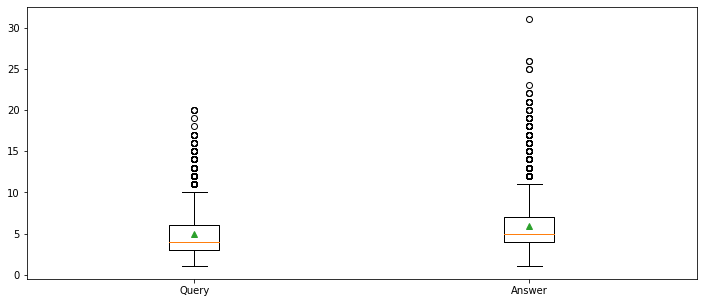

In [58]:
# 박스 플롯
plt.figure(figsize=(12, 5))
plt.boxplot([query_sent_len_by_morph, answer_sent_len_by_morph], 
            labels=['Query', 'Answer'] ,showmeans=True)
plt.show()

In [59]:
# 한글 불용어 제거
# 명사(Noun), 형용사(Adjective), 동사(Verb)를 제외한 단어(조사 등, 불용어로 취급)를 모두 제거한 문자열을 생성
query_NAV_token_sentences = list()
answer_NAV_token_sentences = list()

# Q(Query)에 대해 불용어를 제거한 리스트
for s in query_sentences:
    for token, tag in okt.pos(s.replace(' ','')):
        if tag == 'Noun' or tag == 'Adjective' or tag == 'Verb':
            query_NAV_token_sentences.append(token)
query_NAV_token_sentences = ' '.join(query_NAV_token_sentences)
            
# A(Answer)에 대해 불용어를 제거한 리스트
for s in answer_sentences:
    for token, tag in okt.pos(s.replace(' ','')):
        if tag == 'Noun' or tag == 'Adjective' or tag == 'Verb':
            answer_NAV_token_sentences.append(token)
answer_NAV_token_sentences = ' '.join(answer_NAV_token_sentences)

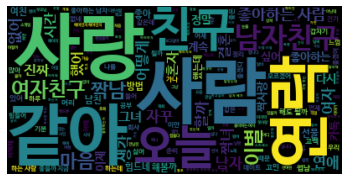

In [65]:
# wordcloud로 Q(Query)의 단어 빈도 확인
# 한글 데이터는 폰트를 설정해줘야함
FONT_PATH = './font/'
query_wordcloud = WordCloud(font_path=FONT_PATH + 'NanumBarunGothicBold.ttf').generate(query_NAV_token_sentences)

plt.imshow(query_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

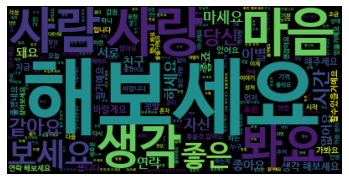

In [63]:
# wordcloud로 A(Answer)의 단어 빈도 확인
answer_wordcloud = WordCloud(font_path=FONT_PATH + 'NanumBarunGothicBold.ttf').generate(answer_NAV_token_sentences)

plt.imshow(answer_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()